In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

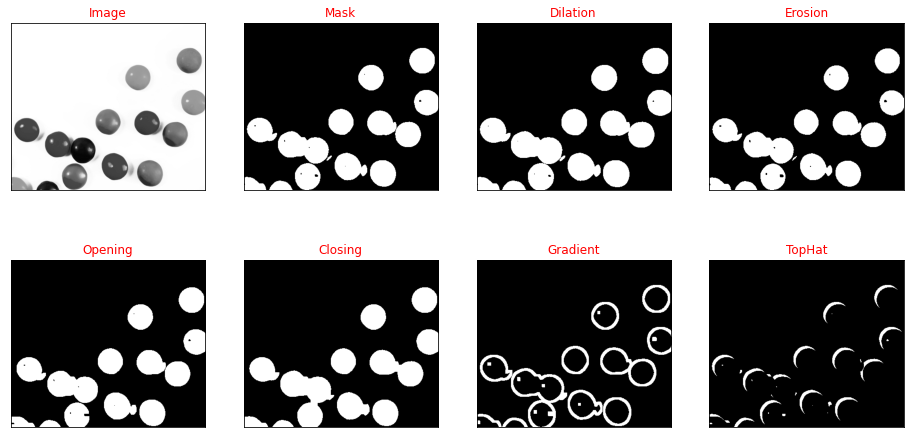

In [48]:
# Morphological transformation are simple operation based on image shape. implemented on binary image. Two thing required
# 1. Original Image, 2. Kernal- tells how to change the value of a given pixel by combining with the neighborhood pixels

fig = plt.figure(figsize=(16,8))
img = cv2.imread('smarties.png', 0)

#now create a mask so that we could do morphological operation
_,mask = cv2.threshold(img, 220,255, cv2.THRESH_BINARY_INV)

#To remove the dot black from the mask image, we use dilation. If we increase the kernel the dark spot will be removed,
#but it will increase the white pixel coz if one pixel under the kernel is one then the whole area will be white/1. To 
#counter this, we need to apply erosion
kernel = np.ones((2,2), np.uint8)
dilation = cv2.dilate(mask, kernel,iterations=1)

#erosion
erosion = cv2.erode(mask, kernel, iterations=1) #it erode away the boundary of foreground object. basically shrink the edge 
#of foreground object. The pixel will be one/1 when all the pixel under the kernel are 1

#opening
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernel, iterations=5) #Combination of erosion + dilation = erosion
#followed by  dilation

#closing
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernel, iterations=5)#Combination of erosion + dilation = dilation
#followed by  erosion

#Morphological Gradient = dilation - erosion
mg = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT, kernel, iterations=5)
                      
#Top Hat = image - opening
th = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT, kernel, iterations=5)


titles = ['Image','Mask','Dilation','Erosion','Opening','Closing','Gradient','TopHat']
images = [img, mask, dilation, erosion, opening, closing,mg,th]

for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i],color='red')
    plt.xticks([]), plt.yticks([])
plt.show()

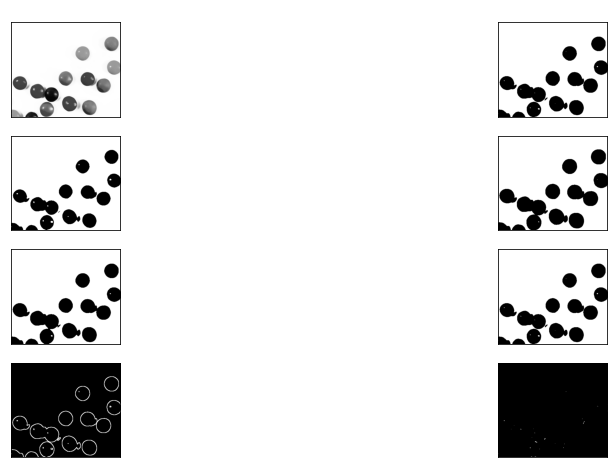

In [12]:
fig = plt.figure(figsize=(16,8))
img = cv2.imread('smarties.png', 0)

_,thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)

dilate = cv2.dilate(thresh, kernel=kernel, iterations=1)

erosion = cv2.erode(thresh, kernel, iterations=1)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

mg = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations=1)

th = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel, iterations=1)


images = [img,thresh,dilate,erosion,opening, closing, mg, th]
titles = ['Image','Threshold','Dilate','Erosion','Opening','Closing','Gradient', 'Top Hat']

for i in range(len(images)):
    plt.subplot(4,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i], color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()